In [4]:
# !pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib as The "tensorflow-gpu" package has been removed!
#   Please install "tensorflow" instead.
!pip install tensorflow opencv-python mediapipe sklearn matplotlib
# pip install mediapipe --user 

In [1]:
#importing dependancies
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
# import mediapipe as mp # ML solutions - Face Detection, Face Mesh, iris, hands, pose, holistic, Hair Segmentation, Object Detection, Box Tracking, Instant Motion Tracking, Objectron, KNIFT 
import mediapipe as mp

In [4]:
#Testing Open CV
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    cv2.imshow('Testing Open CV', frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [2]:
# Getting keypoints from mediapipe holistic
mp_holistic = mp.solutions.holistic # holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [12]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                   # Image is no longer writeable
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)   # COLOR COVERSION RGB 2 BGR
    return image, results

In [13]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [14]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color = (121, 22, 76), thickness = 2, circle_radius = 4),
                              mp_drawing.DrawingSpec(color = (121, 44, 250), thickness = 2, circle_radius = 2)
                              )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color = (121, 22, 76), thickness = 2, circle_radius = 4),
                              mp_drawing.DrawingSpec(color = (121, 44, 250), thickness = 2, circle_radius = 2)
                              )

In [21]:
cap = cv2.VideoCapture(0)
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5 ) as holistic:
    while cap.isOpened():
        # Read Feed
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print("result ", results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed ', image)

        # Break gracefully
        if(cv2.waitKey(10) & 0xFF == ord('q')):
            break

    cap.release()
    cv2.destroyAllWindows()

result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe.python.solution_base.SolutionOutputs'>
result  <class 'mediapipe

In [22]:
image # LAST EXECUTED FRAME

array([[[156, 153, 165],
        [157, 155, 166],
        [157, 154, 167],
        ...,
        [218, 191, 209],
        [217, 190, 206],
        [216, 190, 203]],

       [[154, 154, 165],
        [154, 154, 165],
        [155, 153, 166],
        ...,
        [215, 190, 208],
        [216, 190, 207],
        [217, 190, 206]],

       [[154, 153, 167],
        [154, 153, 167],
        [155, 153, 167],
        ...,
        [212, 191, 206],
        [212, 191, 205],
        [212, 191, 205]],

       ...,

       [[121, 121, 132],
        [121, 121, 132],
        [122, 122, 134],
        ...,
        [149, 155, 168],
        [148, 154, 166],
        [148, 154, 165]],

       [[120, 120, 131],
        [121, 121, 132],
        [121, 121, 132],
        ...,
        [149, 155, 168],
        [149, 155, 167],
        [149, 155, 166]],

       [[119, 119, 130],
        [120, 120, 131],
        [121, 121, 132],
        ...,
        [149, 155, 166],
        [148, 154, 165],
        [148, 154, 165]]

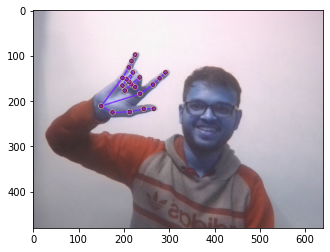

In [23]:
plt.imshow(image)

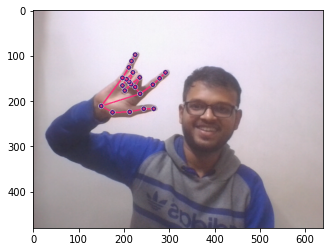

In [25]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))